# Winter Olympics Dataset (DOW #3)

### Sources
* https://www.olympedia.org/
* https://github.com/KeithGalli/Olympics-Dataset/

### Datasets

* In the `data` folder:
  1. `winter_olympics_medals.csv` - subset of `results.csv` from https://github.com/KeithGalli/Olympics-Dataset/ for just **Winter Olympics**
  2. `bios.csv` - information about athletes in `results.csv` (both Winter and Summer games)
  3. `bios_locs.csv` - adding geospatial locations for birth place to `bios.csv`
  4. `populations.csv` - population counts for country by year from 1960-2023
  5. `country-and-continent-codes-list.csv` - mapping between 2- and 3-character country codes and names and numbers

---

### Setup

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

wolympics_df = pd.read_csv('data/winter_olympics_medals.csv')

wolympics_df.sample(20)

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
32760,1998.0,Winter,Ski Jumping (Skiing),"Large Hill, Individual, Men (Olympic)",Dmitry Chvykov,99852,KAZ,NaN,49.0,False,NaN
9268,1984.0,Winter,Ski Jumping (Skiing),"Large Hill, Individual, Men (Olympic)",Rolf Åge Berg,84023,NOR,NaN,52.0,False,NaN
36066,2006.0,Winter,Nordic Combined (Skiing),"Sprint, Men (Olympic)",Jaakko Tallus,101079,FIN,NaN,5.0,False,NaN
36334,2002.0,Winter,Ski Jumping (Skiing),"Normal Hill, Individual, Men (Olympic)",Ildar Fatkullin,101154,RUS,NaN,41.0,False,NaN
20450,1998.0,Winter,Biathlon,"10 kilometres Sprint, Men (Olympic)",Mikael Löfgren,92003,SWE,NaN,25.0,False,NaN
61514,2020.0,Winter,Nordic Combined (Skiing),"Normal Hill / 6 km, Individual, Boys (YOG)",Mateusz Jarosz,139882,POL,NaN,14.0,False,NaN
40404,2006.0,Winter,Ski Jumping (Skiing),"Large Hill, Individual, Men (Olympic)",Dmitry Vasilyev,109730,RUS,NaN,17.0,False,NaN
1659,1994.0,Winter,Biathlon,"7.5 kilometres Sprint, Women (Olympic)",Catarina Eklund,81013,SWE,NaN,59.0,False,NaN
33823,2006.0,Winter,Cross Country Skiing (Skiing),"30 kilometres Skiathlon, Men (Olympic)",Lukáš Bauer,100078,CZE,NaN,10.0,False,NaN
37982,2010.0,Winter,Speed Skating (Skating),"1,000 metres, Men (Olympic)",Nick Pearson,101542,USA,NaN,7.0,False,NaN


In [3]:
wolympics_df['discipline'].value_counts().to_frame()

,count
discipline,
Cross Country Skiing (Skiing),11791
Alpine Skiing (Skiing),11102
Biathlon,7138
Speed Skating (Skating),6734
Ice Hockey (Ice Hockey),6731
Bobsleigh (Bobsleigh),3576
Figure Skating (Skating),2895
Ski Jumping (Skiing),2885
Short Track Speed Skating (Skating),2509


In [5]:
wolympics_df.value_counts('year').to_frame()

,count
year,
2018.0,5140
2014.0,4940
2022.0,4744
2006.0,4438
2010.0,4417
2002.0,4158
2020.0,3988
1998.0,3682
1992.0,3544


https://en.wikipedia.org/wiki/Soviet_Union_at_the_Olympics
https://en.wikipedia.org/wiki/Unified_Team_at_the_Olympics
https://en.wikipedia.org/wiki/Russia_at_the_Olympics

https://en.wikipedia.org/wiki/United_States_at_the_2026_Winter_Olympics

### Competitors by Country

In [10]:
country_cnt_since2002=wolympics_df.query('year>2000').value_counts('noc').to_frame()
country_cnt_since2002.shape

(118, 1)

In [11]:
country_cnt_since2002.head(20)

,count
noc,
USA,2181
CAN,2118
GER,1819
ITA,1604
SUI,1472
RUS,1409
CZE,1309
NOR,1300
JPN,1300


In [12]:
world_gdf = gpd.read_file('data/worldmap.json')

<Axes: >

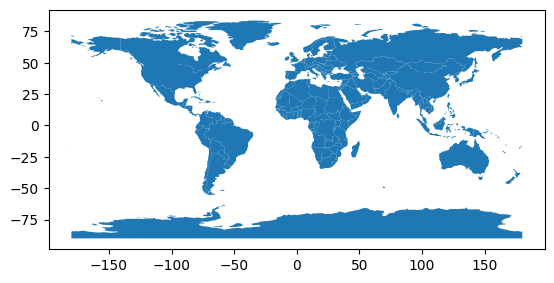

In [13]:
world_gdf.plot()

In [14]:
world_gdf

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRI.geojson,"POLYGON ((-82.5462 9.56613, -82.93289 9.47681,..."
1,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIC.geojson,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
2,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTI.geojson,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
3,Admin-0 country,1,5,Dominican Republic,DOM,0,2,Sovereign country,1,Dominican Republic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOM.geojson,"POLYGON ((-71.7083 18.045, -71.68774 18.31666,..."
4,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,El Salvador,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLV.geojson,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,3,France,FR1,1,2,Dependency,1,New Caledonia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCL.geojson,"POLYGON ((165.77999 -21.08, 166.59999 -21.7000..."
173,Admin-0 country,1,3,Solomon Islands,SLB,0,2,Sovereign country,1,Solomon Islands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLB.geojson,"MULTIPOLYGON (((162.11902 -10.48272, 162.39865..."
174,Admin-0 country,1,4,Vanuatu,VUT,0,2,Sovereign country,1,Vanuatu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VUT.geojson,"MULTIPOLYGON (((167.2168 -15.89185, 167.84488 ..."
175,Admin-0 country,1,4,Antarctica,ATA,0,2,Indeterminate,1,Antarctica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATA.geojson,"MULTIPOLYGON (((-48.66062 -78.04702, -48.1514 ..."


In [15]:
combined_gdf = pd.merge(world_gdf, 
         country_cnt_since2002,
         left_on='sov_a3',
         right_on='noc',
         how='outer')

In [16]:
combined_gdf['count']=combined_gdf['count'].fillna(0)

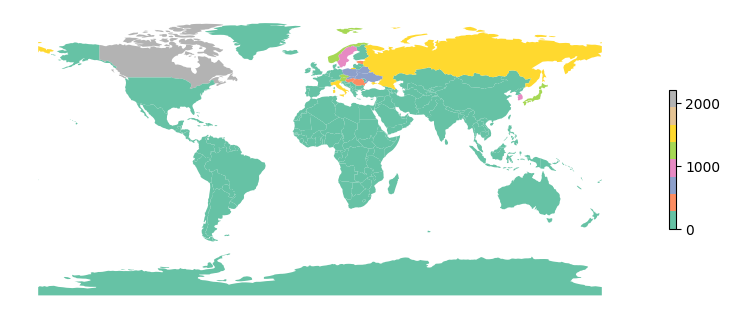

In [17]:
combined_gdf.plot(column='count', 
                  legend=True,
                  legend_kwds={
                      'shrink': 0.3,
                      
                   },
                   figsize=(10, 6),
                vmin=0,
                vmax=2200,
                   cmap='Set2'
)

plt.axis('off')
plt.show()